# Importación de Librerías



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
dir = "/content/drive/MyDrive/AI/Databases/P2/"
print(os.listdir(dir))

['amer_sign2.png', 'american_sign_language.PNG', 'sign_mnist_test.csv', 'amer_sign3.png', 'sign_mnist_train.csv', 'sign_mnist_train', 'sign_mnist_test']


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
trainDir = dir + "sign_mnist_train.csv"
testDir = dir + "sign_mnist_train.csv"
df = pd.read_csv(trainDir)
testdf = pd.read_csv(testDir)
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
X = df.iloc[:,1:]
Y = df.iloc[:,0:1]
X.head()
Y.head()
print(X.shape)
print(Y.shape)

(27455, 784)
(27455, 1)


#Pruebas

In [ ]:
pca_dims = PCA()
pca_dims.fit(X)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

113


Hemos pasado de dimensionalidad = 784 a solo 113.

In [ ]:
pca = PCA(n_components = d)
X_reduced = pca.fit_transform(X) # reducir dimensionalidad
X_recovered = pca.inverse_transform(X_reduced) # transformar de vuelta a dimension original

In [ ]:
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (27455, 113)
recovered shape: (27455, 784)


In [ ]:
X_recovered.shape

(27455, 784)

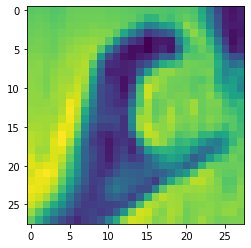

In [ ]:
plt.imshow(X_recovered[2].reshape((28,28)))

#Funcion

In [ ]:
def reduceDimension(originalX):
  pca_dims = PCA()
  pca_dims.fit(originalX)
  cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
  d = np.argmax(cumsum >= 0.95) + 1
  pca = PCA(n_components = d)
  reducedX = pca.fit_transform(originalX)
  recoveredX = pca.inverse_transform(reducedX)
  return reducedX, recoveredX

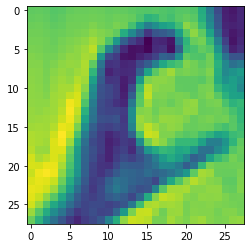

In [ ]:
reducedX, recoveredX = reduceDimension(X)
plt.imshow(recoveredX[2].reshape((28,28)))

#SKLearn Support Vector Machine

In [ ]:
svc = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))
svc.fit(reducedX, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
testX = df.iloc[:,1:]
testX.to_numpy()
testY = df.iloc[:,0:1]

In [ ]:
reducedTestX,recoveredTestX = reduceDimension(testX)
res = svc.predict(reducedTestX)

In [ ]:
print(res)

[ 3  6  2 ... 18 17 23]


In [ ]:
print(testY)

       label
0          3
1          6
2          2
3          2
4         13
...      ...
27450     13
27451     23
27452     18
27453     17
27454     23

[27455 rows x 1 columns]


In [ ]:
print(svc.score(reducedTestX, testY))

0.9987616099071207


In [ ]:
svc2 = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))
svc2.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
print(svc2.score(testX, testY))

X.head()
Y.head()
reducedX, recoveredX = reduceDimension(X)

x = np.c_[df.iloc[:,0:1],reducedX]
np.random.shuffle(x)

1.0


In [ ]:
# K fold

def get_k_fold(array, k , fold):
  """
  Parameters
  ----------
  array : numpy array
      array que se usara en las pruebas
  k : int
      numero de grupos que se crearan
  fold : int
      numero de grupo que se obtendra
  Returns
  -------
  tuple
      train y test, que se usaran en los experimentos
  """
  size_group = int(array.shape[0]/k)
  start = size_group * fold
  end = size_group * (fold+1)
  print(start)
  print(end)
  test = array[start:end,:]
  train_start = array[0:start,:]
  train_end = array[end+1:,:]
  train = np.r_[train_start,train_end]
  return train, test


# Bootstrap

# Idea obtenida de https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
def get_bootstrap(array):
  """
  Parameters
  ----------
  array : numpy array
      array que se usara en las pruebas
  size : int
      tamaño del train, el resto se usa para test
  Returns
  -------
  tuple
      train y test, que se usaran en los experimentos
  """
  index = np.random.randint(x.shape[0], size=x.shape[0])
  train = x[index, :]
  test_index = []
  for val in range(array.shape[0]):
    if not val in index:
      test_index.append(val)
  test = x[test_index,:]
  return train, test

In [ ]:
def test_SVC_k_fold(array, n_k, criterion, splitter):
  rows, cols = 25,25
  results = [([0]*cols) for i in range(rows)]
  presicion_macro = []
  presicion_micro = []
  presicion_weighted = []
  recall_macro = []
  recall_micro = []
  recall_weighted = []
  F1_macro = []
  F1_micro = []
  F1_weighted = []
  auc = []
  for i in range(n_k):
    predicted_list = []
#    print("Fold: ", i)
    train_i, test_i = get_k_fold(array, n_k, i)
    assert(array.shape[1] == test_i.shape[1])
    assert(train_i.shape[1] == test_i.shape[1])
    x_train = train_i[:,1:]
    y_train = train_i[:,0]
    x_test = test_i[:,1:]
    y_test = test_i[:,0]
    svc =  SVC(kernel='rbf', gamma='auto')
    svc.fit(x_train, y_train)    
    for point in range(y_test.shape[0]):
      predicted = desitionTree.predict([x_test[point,:]])[0]
      real = y_test[point]
 #     print(real)
 #     print(predicted)
 #     print("Valor real = ", real, " Valor predecido = ", predicted)
 #     print("Fold: ",i, "Iteracion: ", point, "Puntos Totales: ", y_test.shape[0])
      predicted_list.append(predicted)
    presicion_macro.append(precision_score(y_test, predicted_list, average='macro'))
    presicion_micro.append(precision_score(y_test, predicted_list, average='micro'))
    presicion_weighted.append(precision_score(y_test, predicted_list, average='weighted'))
    recall_macro.append(precision_score(y_test, predicted_list, average='macro'))
    recall_micro.append(precision_score(y_test, predicted_list, average='micro'))
    recall_weighted.append(precision_score(y_test, predicted_list, average='weighted'))
    F1_macro.append(precision_score(y_test, predicted_list, average='macro'))
    F1_micro.append(precision_score(y_test, predicted_list, average='micro'))
    F1_weighted.append(precision_score(y_test, predicted_list, average='weighted'))
  mean_presicion_macro = np.mean(presicion_macro)
  mean_presicion_micro = np.mean(presicion_micro)
  mean_presicion_weight = np.mean(presicion_weighted)
  mean_recall_macro = np.mean(recall_macro)
  mean_recall_micro = np.mean(recall_micro)
  mean_recall_weight = np.mean(recall_weighted)
  mean_F1_macro = np.mean(F1_macro)
  mean_F1_micro = np.mean(F1_micro)
  mean_F1_weight = np.mean(F1_weighted)
  return mean_presicion_macro, mean_presicion_micro, mean_presicion_weight, mean_recall_macro, mean_recall_micro, mean_F1_macro, mean_recall_weight, mean_F1_micro, mean_F1_weight
  
x_reduced = (x)

for repetitions in [3,5,7,10]:
  p_macro, p_micro, p_weight, r_macro, r_micro, r_weight, F1_macro, F1_micro, F1_weight = test_desition_tree_k_fold(x_reduced, repetitions)
  print("Presicion Macro: ", p_macro, "with ", repetitions, " repetitions ")
  print("Presicion Micro: ", p_micro, "with ", repetitions, " repetitions ")
  print("Presicion weighted: ", p_weight, "with ", repetitions, " repetitions")
  print("Recall Macro: ", r_macro, "with ", repetitions, " repetitions  ")
  print("Recall Micro: ", r_micro, "with ", repetitions, " repetitions")
  print("Recall weighted: ", r_weight, "with ", repetitions, " repetitions ")
  print("F1 Macro: ", F1_macro, "with ", repetitions, " repetitions ")
  print("F1 Micro: ", F1_micro, "with ", repetitions, " repetitions")
  print("F1 weighted: ", F1_weight, "with ", repetitions, " repetitions")